# Laboratorio

Limpiar un set de datos con pandas

* Un set de datos que tengan permisos para compartir con nosotros
  * Más de 100000 registros
  * Más de 20 columnas
  * Con datos con cadenas, numeros, fechas y categorías

* Usar los permisos de edificación de San Francisco
  * https://www.kaggle.com/aparnashastry/building-permit-applications-data/data
  
El análisis tiene que ser reproducible en las máquinas de los profes

## Importando los datos

In [8]:
import numpy as np
import pandas as pd
from hashlib import md5
from sklearn import preprocessing

url="https://raw.githubusercontent.com/franciscocrespo/"
path="diplo_datos_2018/master/Analisis_y_Curacion/Building_Permits.csv"

np.random.seed(0)
pd.set_option('display.max_columns',150)
building_permits = pd.read_csv(url+path)
building_permits.sample(5)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
40553,201403039652,8,otc alterations permit,03/03/2014,3732,008,400,NaN,Clementina,St,NaN,NaN,evacuation maps floors basement to roof. maher...,withdrawn,04/16/2014,03/03/2014,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,10000.0,0.00,vacant lot,0.0,apartments,182.0,0.0,NaN,NaN,NaN,1.0,constr type 1,NaN,6.0,South of Market,94103.0,"(37.780460571778164, -122.40450626524974)",1334094491645
169731,201510159735,3,additions alterations or repairs,10/15/2015,2609,028,79,NaN,Buena Vista,Tr,NaN,NaN,revision to pa# 2015/06/03/7991. 1st floor: lo...,complete,08/18/2017,10/15/2015,01/21/2016,08/18/2017,01/21/2016,NaN,3.0,3.0,NaN,NaN,01/05/2019,300000.0,300000.00,2 family dwelling,2.0,2 family dwelling,2.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94117.0,"(37.76757916496494, -122.43793170417105)",1399356139170
19180,M409787,8,otc alterations permit,07/22/2013,4624,031,178,NaN,West Point,Rd,NaN,NaN,create two addresses to existing building at b...,issued,07/22/2013,07/22/2013,07/22/2013,NaN,07/22/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73524725436046, -122.38063828309745)",1311685491725
68047,201411191888,8,otc alterations permit,11/19/2014,0039,109,294,NaN,Francisco,St,0.0,NaN,to obtain final inspection for work approved u...,issued,11/19/2014,11/19/2014,11/19/2014,NaN,11/19/2014,NaN,3.0,3.0,NaN,NaN,11/14/2015,1.0,1.00,2 family dwelling,2.0,2 family dwelling,2.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,North Beach,94133.0,"(37.805257822817126, -122.40998545760392)",1362881288870
64238,M527228,8,otc alterations permit,10/14/2014,1251,002,707,NaN,Cole,St,NaN,NaN,street space permit,issued,10/14/2014,10/14/2014,10/14/2014,NaN,10/14/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Haight Ashbury,94117.0,"(37.76836885973765, -122.45074431487859)",135886493776


A simple vista no se observan problemas en la importación. Se trata de un documento con 43 columnas y 200 mil filas.

In [9]:
building_permits.shape

(198900, 43)

Según la documentación los tipos de cada columna son los siguientes:

In [10]:
pd.DataFrame([["Permit Number", "String"], ["Permit Type", "Numeric"], ["Permit Type Definition", "String"], 
              ["Permit Creation Date", "DateTime"], ["Block", "String"], ["Lot", "String"], ["Street Number", "Numeric"],
              ["Street Number Suffix", "String"], ["Street Name", "String"], ["Street Suffix", "String"], 
              ["Unit", "String"], ["Unit Suffix", "String"], ["Description", "String"], ["Current Status", "String"], 
              ["Current Status Date", "DateTime"], ["Filed Date", "DateTime"], ["Issued Date", "String"], 
              ["Completed Date", "String"], ["First Construction Docu", "String"], ["Structural Notification", "String"],
              ["Number of Existing Stor", "String"], ["Number of Proposed Stor", "String"], ["Voluntary Soft-Story R", "String"],
              ["Fire Only Permit", "String"], ["Permit Expiration Date", "String"], ["Estimated Cost", "String"], 
              ["Revised Cost", "String"], ["Existing Use", "String"], ["Existing Units", "String"], ["Proposed Use", "String"],
              ["Proposed Units", "String"], ["Plansets", "String"], ["TIDF Compliance", "String"], ["Existing Construction Ty", "String"],
              ["Existing Construction Ty", "String"], ["Proposed Construction", "String"], ["Proposed Construction ", "String"], 
              ["Site Permit", "String"], ["Supervisor District", "Numeric"], ["Neighborhoods - Analysis ", "String"], 
              ["Zipcode", "Numeric"], ["Location", "String"], ["Record ID", "Numeric"]], columns=["Field name", "Type"]) 

,Field name,Type
0,Permit Number,String
1,Permit Type,Numeric
2,Permit Type Definition,String
3,Permit Creation Date,DateTime
4,Block,String
5,Lot,String
6,Street Number,Numeric
7,Street Number Suffix,String
8,Street Name,String
9,Street Suffix,String


Veamos los tipos que pose el dataframe de los datos importados:

In [11]:
building_permits.dtypes

Permit Number                              object
Permit Type                                 int64
Permit Type Definition                     object
Permit Creation Date                       object
Block                                      object
Lot                                        object
Street Number                               int64
Street Number Suffix                       object
Street Name                                object
Street Suffix                              object
Unit                                      float64
Unit Suffix                                object
Description                                object
Current Status                             object
Current Status Date                        object
Filed Date                                 object
Issued Date                                object
Completed Date                             object
First Construction Document Date           object
Structural Notification                    object


**El tipo object corresponde a los string. Se observa que no respetó los tipos de la fecha y que algunos string los considera como float. A continuación hacemos el cambio de tipos.**

In [12]:
building_permits = pd.read_csv(url+path, 
                               parse_dates=["Permit Creation Date", 
                                            "Current Status Date", 
                                            "Filed Date"],
                               index_col=['Record ID'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# Función para cambiar el tipo de las columnas
def numeric_to_string(row):
  return str(row)

In [0]:
# Aplicamos la función anterior para cambiar el tipo de las siguientes columnas
building_permits["Unit"] = building_permits["Unit"].apply(numeric_to_string)
building_permits["Number of Existing Stories"] = \
  building_permits["Number of Existing Stories"].apply(numeric_to_string)
building_permits["Number of Proposed Stories"] = \
  building_permits["Number of Proposed Stories"].apply(numeric_to_string)
building_permits["Estimated Cost"] = \
  building_permits["Estimated Cost"].apply(numeric_to_string)
building_permits["Revised Cost"] = \
  building_permits["Revised Cost"].apply(numeric_to_string)
building_permits["Existing Units"] = \
  building_permits["Existing Units"].apply(numeric_to_string)
building_permits["Proposed Units"] = \
  building_permits["Proposed Units"].apply(numeric_to_string)
building_permits["Plansets"] = \
  building_permits["Plansets"].apply(numeric_to_string)
building_permits["Existing Construction Type"] = \
  building_permits["Existing Construction Type"].apply(numeric_to_string)
building_permits["Proposed Construction Type"] = \
  building_permits["Proposed Construction Type"].apply(numeric_to_string)

In [15]:
building_permits.dtypes

Permit Number                                     object
Permit Type                                        int64
Permit Type Definition                            object
Permit Creation Date                      datetime64[ns]
Block                                             object
Lot                                               object
Street Number                                      int64
Street Number Suffix                              object
Street Name                                       object
Street Suffix                                     object
Unit                                              object
Unit Suffix                                       object
Description                                       object
Current Status                                    object
Current Status Date                       datetime64[ns]
Filed Date                                datetime64[ns]
Issued Date                                       object
Completed Date                 

**Tras las correcciones los datos ya tienen igual tipo que el especificado en la documentación del dataset.**

In [16]:
# Ahora veamos un resumen de los datos:
building_permits.describe(include='all')

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
count,198900,198900.000000,198900,198900,198900,198900,198900.000000,2216,198900,196132,198900,1961,198610,198900,198900,198900,183960,97191,183954,6922,198900,198900,35,18827,147020,198900,198900,157786,198900,156461,198900,198900,2,198900,155534,198900,155738,5359,197183.000000,197175,197184.000000,197200
unique,181495,NaN,8,1291,4896,1055,NaN,18,1704,21,661,164,134272,14,1307,1288,1289,1300,1288,1,65,65,1,1,2232,11396,12630,93,349,94,369,9,2,6,5,6,5,1,NaN,41,NaN,57604
top,201602179765,NaN,otc alterations permit,2017-09-15 00:00:00,3708,001,NaN,A,Market,St,nan,A,street space,complete,2017-09-15 00:00:00,2017-09-15 00:00:00,06/15/2016,10/30/2015,11/07/2016,Y,2.0,2.0,Y,Y,02/28/2018,nan,1.0,1 family dwelling,nan,1 family dwelling,nan,2.0,Y,5.0,wood frame (5),5.0,wood frame (5),Y,NaN,Financial District/South Beach,NaN,"(37.79226164705184, -122.4034859571375)"
freq,101,NaN,178844,413,1195,10114,NaN,1501,5443,138358,169421,346,22163,97077,474,412,341,206,339,6922,52767,50991,35,18827,302,38066,47228,46766,51538,46346,50911,98088,1,113350,113350,114382,114382,5359,NaN,21816,NaN,554
first,NaN,NaN,NaN,2012-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-01-02 00:00:00,2013-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-03-02 00:00:00,2018-02-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.522323,NaN,NaN,NaN,NaN,1121.728944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.538403,NaN,94115.500558,NaN
std,NaN,1.457451,NaN,NaN,NaN,NaN,1135.768948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.887041,NaN,9.270131,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,94102.000000,NaN
25%,NaN,8.000000,NaN,NaN,NaN,NaN,235.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,94109.000000,NaN


In [17]:
# chequeamos si hay datos duplicados
building_permits.duplicated().sum()

69

**En la siguiente tabla podemos observar los duplicados que existen si tenemos como clave primaria la columna Record ID. Se pueden ver varias filas identicas pero con distinta clave.** 

In [18]:
building_permits[building_permits.duplicated(keep=False)]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
Record ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1294937199934,201302019267,8,otc alterations permit,2013-02-01,6280,043,806,NaN,Russia,Av,nan,NaN,install shake vinyl siding on back of house on...,complete,2013-05-08,2013-02-01,02/01/2013,05/08/2013,02/01/2013,NaN,3.0,3.0,NaN,NaN,01/27/2014,7935.0,7935.0,2 family dwelling,2.0,2 family dwelling,2.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Excelsior,94112.0,"(37.71823948380821, -122.43070649984861)"
1294939199934,201302019267,8,otc alterations permit,2013-02-01,6280,043,806,NaN,Russia,Av,nan,NaN,install shake vinyl siding on back of house on...,complete,2013-05-08,2013-02-01,02/01/2013,05/08/2013,02/01/2013,NaN,3.0,3.0,NaN,NaN,01/27/2014,7935.0,7935.0,2 family dwelling,2.0,2 family dwelling,2.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Excelsior,94112.0,"(37.71823948380821, -122.43070649984861)"
1300138395703,201303283290,8,otc alterations permit,2013-03-28,3987,024,135,NaN,Mississippi,St,0.0,NaN,replace 3 exisitng non-forming stairs with 2 n...,complete,2014-03-24,2013-03-28,04/05/2013,03/24/2014,04/05/2013,NaN,3.0,3.0,NaN,NaN,03/20/2016,625000.0,800000.0,office,0.0,office,0.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,Potrero Hill,94107.0,"(37.76459192915239, -122.394376794674)"
1300835395703,201303283290,8,otc alterations permit,2013-03-28,3987,024,135,NaN,Mississippi,St,0.0,NaN,replace 3 exisitng non-forming stairs with 2 n...,complete,2014-03-24,2013-03-28,04/05/2013,03/24/2014,04/05/2013,NaN,3.0,3.0,NaN,NaN,03/20/2016,625000.0,800000.0,office,0.0,office,0.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,10.0,Potrero Hill,94107.0,"(37.76459192915239, -122.394376794674)"
1301514164635,201304124392,8,otc alterations permit,2013-04-12,3717,005,160,NaN,Spear,St,nan,NaN,19th floor. fire sprinkler permit. relocate ...,complete,2013-04-24,2013-04-12,04/12/2013,04/24/2013,04/12/2013,NaN,19.0,19.0,NaN,Y,04/07/2014,3000.0,3000.0,office,nan,office,nan,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,"(37.79157492973848, -122.3933901193989)"
1301529164635,201304124392,8,otc alterations permit,2013-04-12,3717,005,160,NaN,Spear,St,nan,NaN,19th floor. fire sprinkler permit. relocate ...,complete,2013-04-24,2013-04-12,04/12/2013,04/24/2013,04/12/2013,NaN,19.0,19.0,NaN,Y,04/07/2014,3000.0,3000.0,office,nan,office,nan,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Financial District/South Beach,94105.0,"(37.79157492973848, -122.3933901193989)"
1308828100339,201306210141,2,new construction wood frame,2013-06-21,1453,013,363,NaN,21st,Av,nan,NaN,"erect 4-story, 3-unit dwelling residence",issued,2015-03-24,2013-06-21,03/24/2015,NaN,03/25/2016,NaN,nan,4.0,NaN,NaN,03/08/2018,500000.0,1200000.0,NaN,nan,apartments,3.0,2.0,NaN,nan,NaN,5.0,wood frame (5),Y,1.0,Outer Richmond,94121.0,"(37.78102771976823, -122.48083375518638)"
1308830100339,201306210141,2,new construction wood frame,2013-06-21,1453,013,363,NaN,21st,Av,nan,NaN,"erect 4-story, 3-unit dwelling residence",issued,2015-03-24,2013-06-21,03/24/2015,NaN,03/25/2016,NaN,nan,4.0,NaN,NaN,03/08/2018,500000.0,1200000.0,NaN,nan,apartments,3.0,2.0,NaN,nan,NaN,5.0,wood frame (5),Y,1.0,Outer Richmond,94121.0,"(37.78102771976823,

In [0]:
# A continuación eliminamos la ultima de las filas duplicadas
bp = building_permits.drop_duplicates(keep='last')

In [20]:
# Comprobamos si siguen existiendo filas duplicadas
bp.duplicated().sum()

0

**Tras procesamiento el dataset queda sin filas duplicadas**


**A continuación encriptaremos un dato sensible, nos parecio que en número en la calle identifica a la persona asociada al permiso de construcción.**

In [0]:
# Función de encriptación de datos
def hashit(val):
    if isinstance(val, int): 
        val = str(val)
    return md5(val.encode('utf-8')).hexdigest()

In [22]:
bp.loc[:, "Street Number"] = bp["Street Number"].apply(hashit)

bp.sample(5)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
Record ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1338366380790,201404113022,8,otc alterations permit,2014-04-11,3545,018A,5b6ba13f79129a74a3e819b78e36b922,NaN,15th,St,nan,NaN,"like for like window replacement, interior ele...",issued,2014-04-11,2014-04-11,04/11/2014,NaN,04/11/2014,NaN,2.0,2.0,NaN,NaN,04/06/2015,5000.0,88500.0,2 family dwelling,2.0,2 family dwelling,2.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Mission,94103.0,"(37.766508011617525, -122.42470825254468)"
1420954134202,201604265722,8,otc alterations permit,2016-04-26,2395,010,b427426b8acd2c2e53827970f2c2f526,NaN,30th,Av,nan,NaN,revision to original floor plan to pa 20150421...,issued,2016-04-26,2016-04-26,04/26/2016,NaN,04/26/2016,NaN,2.0,2.0,NaN,NaN,04/21/2017,1.0,1.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94116.0,"(37.74148218288813, -122.48773245892082)"
1347374296596,201406300087,8,otc alterations permit,2014-06-30,0240,007,069d3bb002acd8d7dd095917f9efe4cb,NaN,California,St,0.0,NaN,#1925- t.i. on 19th floor. construction of non...,complete,2014-08-26,2014-06-30,07/16/2014,08/26/2014,07/16/2014,NaN,23.0,23.0,NaN,NaN,07/11/2015,58000.0,58000.0,office,0.0,office,0.0,2.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Financial District/South Beach,94104.0,"(37.792967592773664, -122.40413957386114)"
1385449206530,201506179229,8,otc alterations permit,2015-06-17,6533,022,a516a87cfcaef229b342c437fe2b95f7,NaN,Fair Oaks,St,nan,NaN,reroofing,complete,2015-07-03,2015-06-17,06/17/2015,07/03/2015,06/17/2015,NaN,2.0,2.0,NaN,NaN,06/11/2016,18000.0,18000.0,apartments,7.0,apartments,7.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Mission,94110.0,"(37.74898140859125, -122.42342562806888)"
1412297153630,201602129497,8,otc alterations permit,2016-02-12,3148,005,ed46558a56a4a26b96a68738a0d28273,NaN,Mission,St,nan,NaN,"replace (2) skylights same location, same size...",complete,2016-06-22,2016-02-12,02/12/2016,06/22/2016,02/12/2016,NaN,2.0,2.0,NaN,NaN,02/06/2017,1000.0,1000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Outer Mission,94112.0,"(37.72486369921283, -122.43502948154949)"


## Limpiando datos

### Pasos necesarios

In [23]:
# Verificamos que en las columnas no hay caracteres raros \W se refiere a los caracteres no alfanuméricos
bp.columns[bp.columns == bp.columns.str.extract(r'^(\W+)$')]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


Index([], dtype='object')

**Como se puede observar, en la salida anterior, no se ha encontrado ninguna columna con caracteres no alfanuméricos.**

In [24]:
# vemos el encoding del dataset

import chardet
import urllib

resource = urllib.request.urlopen(url+path)
print(chardet.detect(resource.read(10000)))

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [25]:
# obtenemos la cantidad de información faltante por columna
missing_values_count = bp.isnull().sum()

missing_values_count[missing_values_count.values > 0]

Street Number Suffix                      196617
Street Suffix                               2767
Unit Suffix                               196871
Description                                  288
Issued Date                                14928
Completed Date                            101670
First Construction Document Date           14934
Structural Notification                   191910
Voluntary Soft-Story Retrofit             198796
Fire Only Permit                          180011
Permit Expiration Date                     51852
Existing Use                               41094
Proposed Use                               42421
TIDF Compliance                           198829
Existing Construction Type Description     43345
Proposed Construction Type Description     43143
Site Permit                               193476
Supervisor District                         1716
Neighborhoods - Analysis Boundaries         1724
Zipcode                                     1715
Location            

**Podemos ver que hay datos faltantes por no registrarlos como en el caso de Zipcode, Location e información que no esta, porque no existe como es el caso de Street Number Sufix y Unit Suffix.**

In [26]:
# Observamos el porcentaje de información faltante
total_cells = np.product(bp.shape)
total_missing = missing_values_count.sum()

(total_missing/total_cells) * 100

20.594254369168745

**Un 20% de los datos no tiene valor asignado. De una muestra de 200 000 datos suponen 40 000. Se observa que columnas como Site Permit, TIDF Compliance, entre otras, tienen casi la totalidad de las filas sin completar. Vamos a sacar esas columnas y nos quedamos con el resto.**

In [27]:
# Sacando columnas sin valores
columns = ['Street Number Suffix', 'Unit Suffix', 'Completed Date',
           'Structural Notification', 'Voluntary Soft-Story Retrofit',
           'Fire Only Permit', 'TIDF Compliance', 'Site Permit']
bp_drop_col = bp.drop(columns, axis=1)
bp_drop_col.shape

(198831, 34)

In [28]:
missing_values_count_1 = bp_drop_col.isnull().sum()
missing_values_count_1[missing_values_count_1.values > 0]
total_cells_1 = np.product(bp_drop_col.shape)
total_missing_1 = missing_values_count_1.sum()

(total_missing_1/total_cells_1) * 100

3.8700616870312863

**Tras sacar las columnas vacias solo nos queda casi un 4% de los datos sin asignación. Como en la mayoria de los casos, estás variables son categóricas o descriptivas vamos a optar por sacar las filas que tengan algun valor nulo.**

In [29]:
bp_not_na_values = bp_drop_col.dropna()
bp_not_na_values.shape

(136495, 34)

**A continuación codificaremos las variables categóricas, estas deben de ser etiquetadas como númericas y no como cadenas de texto.**

In [30]:
bp_not_na_values.describe(include=['O'])

,Permit Number,Permit Type Definition,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Description,Current Status,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Neighborhoods - Analysis Boundaries,Location
count,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495,136495
unique,124470,3,4769,992,4908,1623,21,628,111578,10,1289,1288,64,64,2024,10291,11641,92,332,92,339,6,5,5,5,5,41,48055
top,201602179758,otc alterations permit,3708,001,c4ca4238a0b923820dcc509a6f75849b,Market,St,nan,reroofing,complete,06/15/2016,11/07/2016,2.0,2.0,02/28/2018,1.0,1.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),Financial District/South Beach,"(37.79226164705184, -122.4034859571375)"
freq,66,127847,1075,6437,1743,4194,94585,115565,9008,91397,302,302,47816,46990,279,14620,13730,42864,43468,42259,42837,75929,100861,100861,100839,100839,17022,512


**Se observa que hay variables numéricas que aparecen en la tabla descriptiva. Esas variables no de van a mapear a valores enteros, sin embargo, aparecen variables categóricas como Current Status. Hagamos un mapeo de esa columna y veamos los resultados**

In [31]:
column='Current Status'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(bp_not_na_values[column])

LabelEncoder()

In [32]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'approved': 0,
 'cancelled': 1,
 'complete': 2,
 'expired': 3,
 'incomplete': 4,
 'issued': 5,
 'reinstated': 6,
 'revoked': 7,
 'suspend': 8,
 'withdrawn': 9}

In [33]:
# Apply the fitted encoder to the pandas column
bp_not_na_values[column] = le.transform(bp_not_na_values[column]) 
bp_not_na_values.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
Record ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1443574295566,201611072166,8,otc alterations permit,2016-11-07,0156,011,4122cb13c7a474c1976c9706ae36521d,Pacific,Av,0.0,repair dryrot & stucco at front of bldg.,2,2017-07-24,2016-11-07,07/18/2017,07/18/2017,2.0,2.0,07/13/2018,2000.0,2000.0,1 family dwelling,1.0,1 family dwelling,1.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)"
1466911170855,201706149344,8,otc alterations permit,2017-06-14,4105,009,7a53928fa4dd31e82c6ef826f341daec,Indiana,St,nan,evac maps,5,2017-07-06,2017-06-14,07/06/2017,07/06/2017,5.0,5.0,07/01/2018,4000.0,4000.0,apartments,326.0,apartments,326.0,2.0,1.0,constr type 1,1.0,constr type 1,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)"
1468970403692,201706300814,8,otc alterations permit,2017-06-30,1739,020,71f6278d140af599e06ad9bf1ba03cb0,11th,Av,0.0,re-roofing,2,2017-07-12,2017-06-30,06/30/2017,06/30/2017,3.0,3.0,06/25/2018,12000.0,12000.0,apartments,5.0,apartments,5.0,0.0,5.0,wood frame (5),5.0,wood frame (5),5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)"
1473796372030,201708084249,8,otc alterations permit,2017-08-08,0542,039,c4ca4238a0b923820dcc509a6f75849b,Charlton,Ct,nan,re-roofing,5,2017-08-08,2017-08-08,08/08/2017,08/08/2017,4.0,4.0,08/08/2018,64650.0,64650.0,apartments,9.0,apartments,9.0,0.0,5.0,wood frame (5),5.0,wood frame (5),2.0,Marina,94123.0,"(37.79739093461306, -122.43127133823367)"
1474841115935,201708165014,8,otc alterations permit,2017-08-16,1824,006,1f3202d820180a39f736f20fce790de8,29th,Av,nan,re-roofing,5,2017-08-16,2017-08-16,08/16/2017,08/16/2017,2.0,2.0,02/16/2018,7000.0,7000.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),4.0,Sunset/Parkside,94122.0,"(37.76052279949518, -122.4879889739165)"


**Los valores de la columna, Current Status, ahora son numéricos.**

**A continuación se verificará la consistencia de los datos**

In [34]:
bp_not_na_values.sample(5)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Street Suffix,Unit,Description,Current Status,Current Status Date,Filed Date,Issued Date,First Construction Document Date,Number of Existing Stories,Number of Proposed Stories,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location
Record ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1379642231658,201504284836,3,additions alterations or repairs,2015-04-28,0117,007,8c7bbbba95c1025975e548cee86dfadc,Green,St,nan,soft story retrofit of 6 unit to comply with m...,5,2015-07-27,2015-04-28,07/27/2015,07/27/2015,3.0,3.0,07/21/2016,100000.0,100000.0,apartments,6.0,apartments,6.0,2.0,5.0,wood frame (5),5.0,wood frame (5),3.0,Chinatown,94133.0,"(37.79967325114615, -122.40997368682713)"
1346679246147,201406259493,8,otc alterations permit,2014-06-25,2799,048,647bba344396e7c8170902bcf2e15551,Burnett,Av,nan,soft story retrofit. installing 10 sheel stron...,2,2014-10-31,2014-06-25,06/27/2014,06/27/2014,3.0,3.0,06/22/2015,40000.0,40000.0,apartments,16.0,apartments,16.0,2.0,5.0,wood frame (5),5.0,wood frame (5),8.0,Twin Peaks,94131.0,"(37.75246334769863, -122.44445247524618)"
1384067107886,201506048168,8,otc alterations permit,2015-06-04,1636,011,08d98638c6fcd194a4b1e6992063e944,09th,Av,nan,remodel existing bath and kitchen. change cabi...,5,2015-06-04,2015-06-04,06/04/2015,06/04/2015,2.0,2.0,05/29/2016,55000.0,55000.0,2 family dwelling,2.0,2 family dwelling,2.0,0.0,5.0,wood frame (5),5.0,wood frame (5),1.0,Inner Richmond,94118.0,"(37.77558263642959, -122.46680148950145)"
136280187336,201411181816,8,otc alterations permit,2014-11-18,1020,036,1b318124e37af6d74a03501474f44ea1,Sacramento,St,nan,"install an automatic fire alarm system, the s...",5,2014-11-19,2014-11-18,11/19/2014,11/19/2014,3.0,3.0,11/14/2015,3376.0,3376.0,retail sales,2.0,retail sales,2.0,2.0,5.0,wood frame (5),5.0,wood frame (5),2.0,Presidio Heights,94118.0,"(37.78765886031586, -122.45005605189577)"
1383309121320,201505297574,8,otc alterations permit,2015-05-29,2002,031,231141b34c82aa95e48810a9d1b33a79,48th,Av,nan,"driveway cement replacement, approx. 112 sq. f...",5,2015-05-29,2015-05-29,05/29/2015,05/29/2015,2.0,2.0,05/23/2016,500.0,1100.0,1 family dwelling,1.0,1 family dwelling,1.0,0.0,5.0,wood frame (5),5.0,wood frame (5),4.0,Sunset/Parkside,94122.0,"(37.75371569195128, -122.50727407098287)"


**Un paso muy importante es identificar y documentar valores atípicos/outliers**

**En este set de datos no existen datos numéricos que provengan de variables medibles. Los datos son categóricos, descriptivos o son indices. En este caso los valores atípicos pueden deberse a un error accidental en la adquicisón de los datos. Un ejemplo puede ser que, al completar el formulario, se equivoquen en anotar el Distrito del Supervisor. Si el error es muy grande ese dato aparecerá como un outlier.**

**Si tomamos, por ejemplo, un tipo de dato numerico, columna Supervisor District, vemos que no hay existencia de valores atípicos. O sea, no hubo error en la adquicisión del dato** 

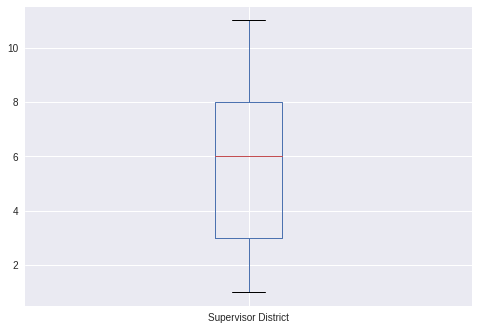

In [35]:
bp_not_na_values.boxplot(column='Supervisor District')

**Evaluar el formato en el que vamos a guardar los datos**

**Guardar los datos**